In [8]:
using PyPlot, Distributions;

In [19]:
# k instances of ito integral simulations of f from t=0. to t=1.
function ito_sim{F}(f::F, n, k)
    y   = zeros(k)
    dt  = 1./n
    sdt = sqrt(dt)
    t = 0.
    b = zeros(k)
    for i in 1:n
        db = randn(k) * sdt
        y += f(t, dt, b, db, y) 
        b += db
        t += dt
    end
    y
end;

In [50]:
for n in [1000, 2000, 4000, 8000]
    plt[:hist](ito_sim((t,dt,b,db, y)-> b * dt, n, 10000), alpha=0.5, bins=100, normed=true);
end
(x -> plot(x, pdf(Normal(0, sqrt(1/3), x), color="red"))(linspace(-3,3,1000));

LoadError: LoadError: syntax: incomplete: premature end of input
while loading In[50], in expression starting on line 4

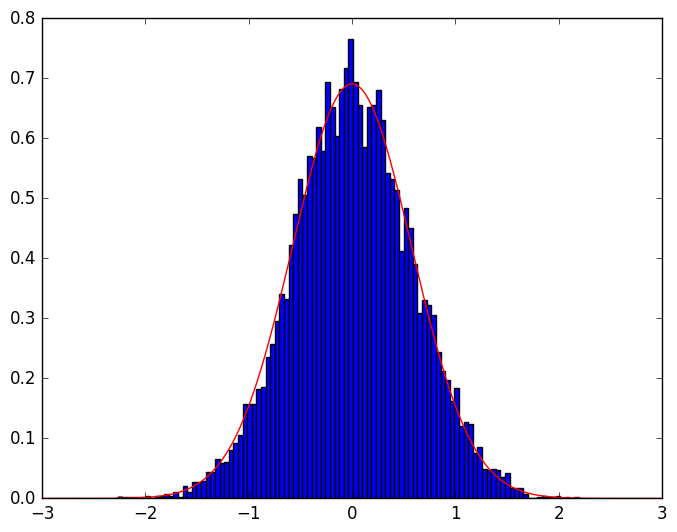

Distributions.Normal{Float64}(μ=0.0, σ=0.5773935702794065)

In [47]:
let n=10000, k=10000, dt=1/n, sdt=sqrt(dt), sigma=sqrt((n+1)*(2*n+1)/(n^2)/6)
    d=zeros(k)
    for i in 1:k
        d[i]=sum(randn(n) .* vec(1:n)) * sdt * dt
    end
    plt[:hist](d, bins=100, normed=true)
    (x->plot(x, pdf(Normal(0, sigma), x), color="red"))(linspace(-3, 3, 10000))
    Normal(0, sigma)
end


In [49]:
let n=10000
    (n+1)*(2*n+1)/(n^2)/6
end

0.333383335